In [1]:
import six
import sys

sys.modules['sklearn.externals.six'] = six
import mlrose
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import time
import os

In [2]:
# Constants
# Dictionaries
RHC_KEY = 'rhc'
SA_KEY = 'sa'
GA_KEY = 'ga'
MIMIC_KEY = 'mimic'

# Algorithm Names
RHC_ALGORITHM = 'Random Hill Climb'
SA_ALGORITHM = 'Simulated Annealing'
GA_ALGORITHM = 'Genetic Algormithm'
MIMIC_ALGORITHM = 'MIMIC'

# Different charts
FITNESS_PLOT = 0
TIME_PLOT = 1

# Chart axes
ITERATIONS_AXIS = 'Iterations'
TIME_AXIS = 'Time'
FITNESS_AXIS = 'Fitness'
ALGORITHM_AXIS = 'Algorithm'

# Tuning
MAX_ITEMS = 50
MAX_WEIGHTS = 40
MAX_VALUES = 5
NUM_OF_EACH = 30
RANDOM_SEED = 10
MAX_WEIGHT_PCT = 0.6
MAX_VAL = 3
SA = 0.9
RESTARTS = 300
MAX_ATTEMPTS = 200
MAX_ITERS = 100000
AVG_ITERS = 10
POPULATION_SIZE = 100
MUTATION_PROB = 0.1
KEEP_PCT = 0.2

# Stuff the record the algorithm times
RHC_TIME = 0
SA_TIME = 1
GA_TIME = 2
MIMIC_TIME = 3
times = []

evaluation = []

In [3]:
# ## Build Knapsack
#
# types_of_items = 35
# maximum_items = 20
#
# # Weights of each of the possible items to add
# weights = np.random.randint(1, MAX_WEIGHTS, size=NUM_OF_EACH)
# # Values of each of the possible items to add
# values = np.random.randint(1, MAX_VALUES, size=NUM_OF_EACH)
# # MAX_WEIGHT_PCT is the percentage of knapack weight used for each item type
# fitness = mlrose.Knapsack(weights.tolist(), values.tolist(), MAX_WEIGHT_PCT)
# print(fitness.values)
# print(fitness.weights)
# print(fitness.get_prob_type())


In [4]:
# length is number of elements in the state vector (int)
# fitness function is the value returned by mlrose.knapsack
# Is this a maximize or minimize problem
# max_cal = max value of each element in state vector - i.e. max number of each item type
# prob = mlrose.DiscreteOpt(length=NUM_OF_EACH,
#                           fitness_fn=fitness,
#                           maximize=True,
#                           max_val=MAX_VAL)
# # initial_state = np.random.randint(MAX_VAL+1, size=NUM_OF_EACH)
# initial_state = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
#                  0, 0, 0, 0, 0, 0]
#
# rnd_initial_state = np.array(initial_state)

In [5]:
probs = []

In [6]:
## Build Travelling Sales Person

np.random.seed(42)
coords = []
prob_len = 100

coords = [np.random.rand(2) for n in range(prob_len)]

## Create the TSP problem
fitness = mlrose.TravellingSales(coords=coords)
tsp_prob = mlrose.TSPOpt(prob_len, fitness)

probs.append(tsp_prob)


In [7]:
## Build Flip Flop

np.random.seed(42)
prob_len = 50


## Create the TSP problem
fitness = mlrose.FlipFlop()
ff_prob = mlrose.DiscreteOpt(prob_len, fitness)

probs.append(ff_prob)

In [8]:
## Build Continuous Peaks

np.random.seed(43)
prob_len = 20


## Create the TSP problem
fitness = mlrose.ContinuousPeaks()
cp_prob = mlrose.DiscreteOpt(prob_len, fitness)

probs.append(cp_prob)

Running TSP SA with decay 0.999
Running TSP SA with decay 0.99
Running TSP SA with decay 0.9
Running TSP SA with decay 0.7
Running TSP SA with decay 0.5
Running TSP SA with decay 0.3
decays = [0.999, 0.99, 0.9, 0.7, 0.5, 0.3]
Plotting SA Curve
/Users/paullivesey/Dropbox/2. Personal/3. Projects/Python
SA best_state = [65  7 54 61 90 83 64 49 55 41 18 72 62 84 21 36 50 29 74 66  1 81 15  9
 28  2 93 46 40 42 11 30 97 92 22 76 13 68 73 47 48 31 44 63 27 98 57 80
 51 23  8 39 85 38 10 14 59 96 17 25 56 99 70 89 67 88 87 94 24 86 32 45
  0 69 60 91 26 78 19  6 52 53 12 82  5 34 16 95 33 79  3 20 58 75 77 35
 71  4 37 43]
SA best_fit = 21.740170852038187
Timing SA Start
Timing SA Stop
Running TSP GA with population 25
Running TSP GA with population 50
Running TSP GA with population 100
Running TSP GA with population 200
Running TSP GA with population 300
Plotting GA Curve
/Users/paullivesey/Dropbox/2. Personal/3. Projects/Python
ga_top_fitness = 42.466853893895134
ga_top_state = [73 83 88 56

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)


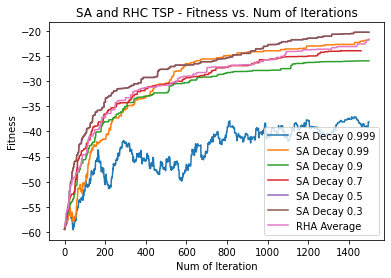

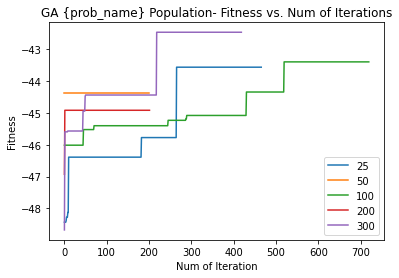

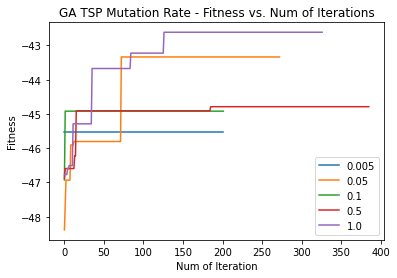

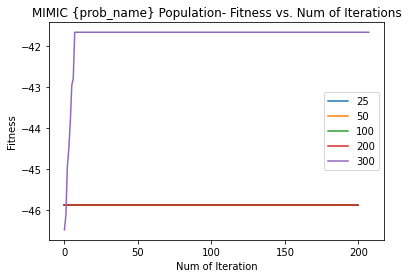

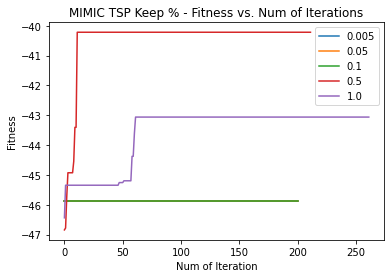

ValueError: Length mismatch: Expected axis has 262 elements, new values have 4 elements

In [10]:
for prob, prob_name in zip (probs, ['TSP', 'FF', 'CP']):

    ## Run the problem through the Simulated Annealing

    MAX_ITERS = 1500
    MAX_ATTEMPTS = 100
    RANDOM_SEED = 42

    decays = [0.999, 0.99, 0.9, 0.7, 0.5, 0.3]

    curves = []
    for decay in decays:
        print(f'Running {prob_name} SA with decay {decay}')

        schedule = mlrose.GeomDecay(decay=decay)
        best_state, \
        best_fit, \
        curve = mlrose.simulated_annealing(prob,
                                           schedule=schedule,
                                           max_attempts=MAX_ATTEMPTS,
                                           curve=True,
                                           random_state=RANDOM_SEED,
                                           max_iters=MAX_ITERS)
        # Add the curve to the curve list
        curves.append(curve)

    ## Run for Random Hill Climb to compare with SA
    best_state, \
    best_fit, \
    curve = mlrose.random_hill_climb(prob,
                                     # schedule=schedule,
                                     max_attempts=MAX_ATTEMPTS,
                                     curve=True,
                                     random_state=RANDOM_SEED,
                                     max_iters=MAX_ITERS)
    # Add the curve to the curve list
    curves.append(curve)

    # Create the fitness curve
    df = pd.DataFrame(curves).transpose()

    # def add_sa(n):
    #     return prob_name + ' ' + n
    # decays = list(map(add_sa, str(decays)))

    print(f'decays = {decays}')

    # decays.append('RHC Average')
    df.columns = ['SA Decay 0.999',
                  'SA Decay 0.99',
                  'SA Decay 0.9',
                  'SA Decay 0.7',
                  'SA Decay 0.5',
                  'SA Decay 0.3',
                  'RHA Average']

    print('Plotting SA Curve')
    df.plot()

    plt.title('SA and RHC TSP - Fitness vs. Num of Iterations')
    plt.xlabel('Num of Iteration')
    plt.ylabel('Fitness')
    print(os.getcwd())
    plt.savefig(f'{os.getcwd()}\\data\\{prob_name}_SA_Fitness.png')
    plt.show()

    print(f'SA best_state = {best_state}')
    print(f'SA best_fit = {best_fit}')

    ## Now time SA

    # Start Timer
    tic = time.perf_counter()

    print('Timing SA Start')
    schedule = mlrose.GeomDecay(decay=0.99)
    best_state, \
    best_fit, \
    curve = mlrose.simulated_annealing(prob,
                                       schedule=schedule,
                                       max_attempts=MAX_ATTEMPTS,
                                       curve=True,
                                       random_state=RANDOM_SEED,
                                       max_iters=MAX_ITERS)
    # Stop timer
    toc = time.perf_counter()
    print('Timing SA Stop')

    # Add the time to the times curve
    total_time = toc - tic
    times.append(total_time / len(curve))
    curves.append(curve)
    evaluation.append(np.argmax(curve) + 1)

    ## Run the problem through the Genetic Algorithm for population

    MAX_ITERS = 5000
    MAX_ATTEMPTS = 200
    RANDOM_SEED = 41

    mutation_rate = [0.005, 0.05, 0.1, 0.5, 1]
    crossover_rate = [10, 25, 50, 75, 100]
    populations = [25, 50, 100, 200, 300]

    top_fitness = 0

    curves = []
    for population in populations:
        print(f'Running {prob_name} GA with population {population}')

        best_state, \
        best_fit, \
        curve = mlrose.genetic_alg(prob,
                                   max_attempts=MAX_ATTEMPTS,
                                   curve=True,
                                   random_state=RANDOM_SEED,
                                   max_iters=MAX_ITERS,
                                   pop_size = population)
        # Add the curve to the curve list
        curves.append(curve)

        ## If this is the best fitness, store the details
        if best_fit > top_fitness:
            ga_top_fitness = best_fit
            ga_top_state = best_state
            ga_top_pop = population

    # Create the fitness curve
    df = pd.DataFrame(curves).transpose()
    df.columns = populations
    print('Plotting GA Curve')
    df.plot()

    plt.title(f'GA {prob_name} Population- Fitness vs. Num of Iterations')
    plt.xlabel('Num of Iteration')
    plt.ylabel('Fitness')
    print(os.getcwd())
    plt.savefig(f'{os.getcwd()}\\{prob_name}_GA_Pop_Fitness.png')
    plt.show()

    print(f'ga_top_fitness = {ga_top_fitness}')
    print(f'ga_top_state = {ga_top_state}')
    print(f'ga_top_population = {ga_top_pop}')
    ## Run the problem through the Genetic Algorithm for mutation rate

    MAX_ITERS = 5000
    MAX_ATTEMPTS = 200
    RANDOM_SEED = 41

    mutation_rates = [0.005, 0.05, 0.1, 0.5, 1]
    populations = [25, 50, 100, 200, 300, 400]

    top_fitness = 0

    curves = []
    for mutation_rate in mutation_rates:
        print(f'Run {prob_name} GA with mutation probability {mutation_rate}')

        best_state, \
        best_fit, \
        curve = mlrose.genetic_alg(prob,
                                   max_attempts=MAX_ATTEMPTS,
                                   curve=True,
                                   random_state=RANDOM_SEED,
                                   max_iters=MAX_ITERS,
                                   mutation_prob = mutation_rate)
        # Add the curve to the curve list
        curves.append(curve)

        ## If this is the best fitness, store the details
        if best_fit > top_fitness:
            ga_top_fitness = best_fit
            ga_top_state = best_state
            ga_top_mutation = mutation_rate

    # Create the fitness curve
    df = pd.DataFrame(curves).transpose()
    df.columns = mutation_rates
    print('Plotting GA Curve')
    df.plot()

    plt.title(f'GA {prob_name} Mutation Rate - Fitness vs. Num of Iterations')
    plt.xlabel('Num of Iteration')
    plt.ylabel('Fitness')
    print(os.getcwd())
    plt.savefig(f'{os.getcwd()}\\{prob_name}_GA_Mut_Fitness.png')
    plt.show()

    print(f'ga_top_fitness = {ga_top_fitness}')
    print(f'ga_top_state = {ga_top_state}')
    print(f'ga_top_mutation = {ga_top_mutation}')
    ## Now time GA

    # Start Timer
    tic = time.perf_counter()

    print('Timing GA Start')
    best_state, \
    best_fit, \
    curve = mlrose.genetic_alg(prob,
                               # schedule=schedule,
                               max_attempts=MAX_ATTEMPTS,
                               curve=True,
                               random_state=RANDOM_SEED,
                               max_iters=MAX_ITERS)
    # Stop timer
    toc = time.perf_counter()
    print('Timing GA Stop')

    # Add the time to the times curve
    total_time = toc - tic
    times.append(total_time / len(curve))
    curves.append(curve)
    evaluation.append(np.argmax(curve) + 1)

    ## Run the problem through MIMIC for population

    MAX_ITERS = 5000
    MAX_ATTEMPTS = 200
    RANDOM_SEED = 41

    populations = [25, 50, 100, 200, 300]

    top_fitness = 0

    curves = []
    for population in populations:
        print(f'Running {prob_name} MIMIC with population {population}')

        best_state, \
        best_fit, \
        curve = mlrose.mimic(prob,
                             max_attempts=MAX_ATTEMPTS,
                             curve=True,
                             random_state=RANDOM_SEED,
                             max_iters=MAX_ITERS,
                             pop_size = population)
        # Add the curve to the curve list
        curves.append(curve)

        ## If this is the best fitness, store the details
        if best_fit > top_fitness:
            mi_top_fitness = best_fit
            mi_top_state = best_state
            mi_top_pop = population

    # Create the fitness curve
    df = pd.DataFrame(curves).transpose()
    df.columns = populations
    print('Plotting MIMIC Curve')
    df.plot()

    plt.title('MIMIC {prob_name} Population- Fitness vs. Num of Iterations')
    plt.xlabel('Num of Iteration')
    plt.ylabel('Fitness')
    print(os.getcwd())
    plt.savefig(f'{os.getcwd()}\\{prob_name}_MIMIC_Pop_Fitness.png')
    plt.show()

    print(f'mi_top_fitness = {mi_top_fitness}')
    print(f'mi_top_state = {mi_top_state}')
    print(f'mi_top_population = {mi_top_pop}')

    ## Run the problem through MIMIC for keep percentage

    MAX_ITERS = 5000
    MAX_ATTEMPTS = 200
    RANDOM_SEED = 41

    keep_pcts = [0.005, 0.05, 0.1, 0.5, 1]

    top_fitness = 0

    curves = []
    for keep_pct in keep_pcts:
        print(f'Running {prob_name} MIMIC with keep_pct {keep_pct}')

        best_state, \
        best_fit, \
        curve = mlrose.mimic(prob,
                             max_attempts=MAX_ATTEMPTS,
                             curve=True,
                             random_state=RANDOM_SEED,
                             max_iters=MAX_ITERS,
                             keep_pct=keep_pct)
        # Add the curve to the curve list
        curves.append(curve)

        ## If this is the best fitness, store the details
        if best_fit > top_fitness:
            mi_top_fitness = best_fit
            mi_top_state = best_state
            mi_top_keep = keep_pct

    # Create the fitness curve
    df = pd.DataFrame(curves).transpose()
    df.columns = keep_pcts
    print('Plotting MIMIC Curve for Keep')
    df.plot()

    plt.title(f'MIMIC {prob_name} Keep % - Fitness vs. Num of Iterations')
    plt.xlabel('Num of Iteration')
    plt.ylabel('Fitness')
    print(os.getcwd())
    plt.savefig(f'{os.getcwd()}\\{prob_name}_MIMIC_keep_Fitness.png')
    plt.show()

    print(f'mi_top_fitness = {mi_top_fitness}')
    print(f'mi_top_state = {mi_top_state}')
    print(f'mi_top_keep = {mi_top_keep}')

    ## Now time MIMIC

    # Start Timer
    tic = time.perf_counter()

    print('Timing MIMIC Start')
    best_state, \
    best_fit, \
    curve = mlrose.mimic(prob,
                         # schedule=schedule,
                         max_attempts=MAX_ATTEMPTS,
                         curve=True,
                         random_state=RANDOM_SEED,
                         max_iters=MAX_ITERS)
    # Stop timer
    toc = time.perf_counter()
    print('Timing MIMIC Stop')

    # Add the time to the times curve
    total_time = toc - tic
    times.append(total_time / len(curve))
    curves.append(curve)

    ## Add to eval to compare each
    evaluation.append(np.argmax(curve) + 1)

    # Output all the information found
    print(f'Maxima = {df.max()}')
    print(f'Time for one iteration = {times}')
    print(f'Function evals at maxima = {evaluation}')


    ## Draw a set of curves to compare all the different algs
    df = pd.DataFrame(curves)
    df.columns = ['RHC', 'SA', 'GA', 'MIMIC']
    print('Plotting All Algs Fitnesses')
    df.plot()

    plt.title(f'All Algorithm Fitness vs. Num of Iterations')
    plt.xlabel('Num of Iteration')
    plt.ylabel('Fitness')
    print(os.getcwd())
    plt.savefig(f'{os.getcwd()}\\{prob_name}_All_Fitness.png')
    plt.show()



# prob - Object containing fitness function optimization problem to be solved.
# For example, DiscreteOpt(), ContinuousOpt() or TSPOpt()
# max_attempts - Maximum number of attempts to find a better neighbor at each step
# restarts - Number of random restarts
# max_iters - Maximum number of iterations of the algorithm.
# init_state - 1-D Numpy array containing starting state for algorithm. If None, then a
# random state is used.

In [14]:
# fitness_results = {RHC_KEY: [], SA_KEY: [], GA_KEY: [], MIMIC_KEY: []}
# rnd_initial_state = np.array(initial_state)
# best_fitness = {RHC_KEY: 0, SA_KEY: 0, GA_KEY: 0, MIMIC_KEY: 0}
# best_state = {RHC_KEY: 0, SA_KEY: 0, GA_KEY: 0, MIMIC_KEY: 0}
#
# time_rhc = 0
# time_sa = 0
# time_ga = 0
# time_mimic = 0
#
# for iterations in [1,
#                    3]:  # , 10, 20, 50, 75, 100, 200, 300, 400, 500, 600, 700, 800, 900,
#     # , 1000, 3000, 5000, 10000, 50000, 75000, 100000, 150000, 200000, 250000]: #range(1, MAX_ITERS, 100):
#     # for iterations in [1, 3, 5, 10, 20, 50, 75, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]:
#     # , 1000, 3000, 5000, 10000, 50000, 75000, 100000, 150000, 200000, 250000]: #range(1, MAX_ITERS, 100):
#     temp_fitness = {RHC_KEY: 0, SA_KEY: 0, GA_KEY: 0, MIMIC_KEY: 0}
#     for rnd_iterations in range(0, AVG_ITERS):
#         # Random Hill Climb
#         start_time = time.time()
#         best_state = {}
#         print('Doing RHC')
#         best_state[RHC_KEY], best_fitness[RHC_KEY] = mlrose.random_hill_climb(prob,
#                                                                               max_attempts=MAX_ATTEMPTS,
#                                                                               restarts=RESTARTS,
#                                                                               max_iters=iterations,
#                                                                               init_state=rnd_initial_state,
#                                                                               random_state=RANDOM_SEED)
#         time_rhc = time.time() - start_time
#         temp_fitness[RHC_KEY] += best_fitness[RHC_KEY]
#
#         # Simulated Annealing
#         start_time = time.time()
#         print('Doing SA')
#         best_state[SA_KEY], best_fitness[SA_KEY] = mlrose.simulated_annealing(prob,
#                                                                               max_attempts=MAX_ATTEMPTS,
#                                                                               schedule=schedule,
#                                                                               max_iters=MAX_ITERS,
#                                                                               init_state=rnd_initial_state)
#         time_sa = time.time() - start_time
#         temp_fitness[SA_KEY] += best_fitness[SA_KEY]
#
#         # Genetic Algorithm
#         start_time = time.time()
#         print('Doing GA')
#         best_state[GA_KEY], best_fitness[GA_KEY] = mlrose.genetic_alg(prob,
#                                                                       max_attempts=MAX_ATTEMPTS,
#                                                                       # schedule=schedule,
#                                                                       max_iters=MAX_ITERS,
#                                                                       mutation_prob=MUTATION_PROB,
#                                                                       pop_size=POPULATION_SIZE)
#         time_ga = time.time() - start_time
#         temp_fitness[GA_KEY] += best_fitness[GA_KEY]
#
#         # MIMIC
#         start_time = time.time()
#         print("Doing MIMIC")
#         best_state[MIMIC_KEY], best_fitness[MIMIC_KEY] = mlrose.mimic(prob,
#                                                                       max_attempts=MAX_ATTEMPTS,
#                                                                       # schexdule=schedule,
#                                                                       max_iters=MAX_ITERS,
#                                                                       # init_state=rnd_initial_state,
#                                                                       pop_size=POPULATION_SIZE,
#                                                                       keep_pct=KEEP_PCT,
#                                                                       fast_mimic=True)
#         time_mimic = time.time() - start_time
#         temp_fitness[MIMIC_KEY] += best_fitness[MIMIC_KEY]
#
#     fitness_results[RHC_KEY].append(
#         [iterations, temp_fitness[RHC_KEY] / AVG_ITERS, time_rhc])
#     print(f'Random Hill Climb finished for {iterations} iterations.')
#     fitness_results[SA_KEY].append(
#         [iterations, temp_fitness[SA_KEY] / AVG_ITERS, time_sa])
#     print(f'Simulated Annealing finished for {iterations} iterations.')
#     fitness_results[GA_KEY].append(
#         [iterations, temp_fitness[GA_KEY] / AVG_ITERS, time_ga])
#     print(f'Genetic Algorithm finished for {iterations} iterations.')
    # fitness_results[MIMIC_KEY].append(
    #     [iterations, temp_fitness[MIMIC_KEY] / AVG_ITERS, time_mimic])
    # print(f'MIMIC finished forr {iterations} iterations.')

Doing RHC
Doing SA
Doing GA
Doing MIMIC
Doing RHC
Doing SA
Doing GA
Doing MIMIC
Doing RHC
Doing SA
Doing GA
Doing MIMIC
Doing RHC
Doing SA
Doing GA
Doing MIMIC
Doing RHC
Doing SA
Doing GA
Doing MIMIC
Doing RHC
Doing SA
Doing GA
Doing MIMIC
Doing RHC
Doing SA
Doing GA
Doing MIMIC
Doing RHC
Doing SA
Doing GA
Doing MIMIC
Doing RHC
Doing SA
Doing GA
Doing MIMIC
Doing RHC
Doing SA
Doing GA
Doing MIMIC
Random Hill Climb finished for 1 iterations.
Simulated Annealing finished for 1 iterations.
Genetic Algorithm finished for 1 iterations.
MIMIC finished for 1 iterations.
Doing RHC
Doing SA
Doing GA
Doing MIMIC
Doing RHC
Doing SA
Doing GA
Doing MIMIC
Doing RHC
Doing SA
Doing GA
Doing MIMIC
Doing RHC
Doing SA
Doing GA
Doing MIMIC
Doing RHC
Doing SA
Doing GA
Doing MIMIC
Doing RHC
Doing SA
Doing GA
Doing MIMIC
Doing RHC
Doing SA
Doing GA
Doing MIMIC
Doing RHC
Doing SA
Doing GA
Doing MIMIC
Doing RHC
Doing SA
Doing GA
Doing MIMIC
Doing RHC
Doing SA
Doing GA
Doing MIMIC
Random Hill Climb finished for

In [16]:
# Create multiple plots at once
# fig, ax = plt.subplot(1, 2)

# Build RHC line plot for Fitness for Iteration count
# fitness_results[RHC_KEY] = pd.DataFrame(fitness_results[RHC_KEY],
#                                         columns=[ITERATIONS_AXIS,
#                                                  FITNESS_AXIS,
#                                                  TIME_AXIS])
# pd[ALGORITHM_AXIS] = RHC_ALGORITHM * fitness_results[RHC_KEY].count()
# sns.lineplot(data=fitness_results[RHC_KEY],
#              x=ITERATIONS_AXIS,
#              y=FITNESS_AXIS,
#              marker='o',
#              legend=True,
#              hue=ALGORITHM_AXIS,
#              ax=ax[FITNESS_PLOT])
#
# # Create grid background.
# sns.set_style("darkgrid", {'axes.axisbelow': True})
# fig.show()
#

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U21'), dtype('<U21')) -> dtype('<U21')

In [ ]:

# # Build RHC line plot for Time for Iteration count
# # sns.lineplot(data=fitness_results[RHC_KEY],
# #              x=ITERATIONS_AXIS,
# #              y=TIME_AXIS,
# #              marker='o',
# #              legend=True,
# #              hue=ALGORITHM_AXIS,
# #              ax=ax[TIME_PLOT])
#
# # Build SA line plot for Fitness for Iteration count
# fitness_results[SA_KEY] = pd.DataFrame(fitness_results[SA_KEY], columns=[ITERATIONS_AXIS,
#                                                                          FITNESS_AXIS,
#                                                                          TIME_AXIS])
# pd[ALGORITHM_AXIS] = SA_ALGORITHM * fitness_results[SA_KEY].count()
# sns.lineplot(data=fitness_results[SA_KEY],
#              x=ITERATIONS_AXIS,
#              y=FITNESS_AXIS,
#              marker='o',
#              legend=True,
#              hue=ALGORITHM_AXIS,
#              ax=ax[FITNESS_PLOT])
#
# # Build GA line plot for Fitness for Iteration count
# fitness_results[GA_KEY] = pd.DataFrame(fitness_results[GA_KEY], columns=[ITERATIONS_AXIS,
#                                                                          FITNESS_AXIS,
#                                                                          TIME_AXIS])
# pd[ALGORITHM_AXIS] = GA_ALGORITHM * fitness_results[GA_KEY].count()
# sns.lineplot(data=fitness_results[GA_KEY],
#              x=ITERATIONS_AXIS,
#              y=FITNESS_AXIS,
#              marker='o',
#              legend=True,
#              hue=ALGORITHM_AXIS,
#              ax=ax[FITNESS_PLOT])
#
# # Build MIMIC line plot for Fitness for Iteration count
# fitness_results[MIMIC_KEY] = pd.DataFrame(fitness_results[MIMIC_KEY],
#                                           columns=[ITERATIONS_AXIS,
#                                                    FITNESS_AXIS,
#                                                    TIME_AXIS])
# pd[ALGORITHM_AXIS] = MIMIC_ALGORITHM * fitness_results[MIMIC_KEY].count()
# sns.lineplot(data=fitness_results[MIMIC_KEY],
#              x=ITERATIONS_AXIS,
#              y=FITNESS_AXIS,
#              marker='o',
#              legend=True,
#              hue=ALGORITHM_AXIS,
#              ax=ax[FITNESS_PLOT])
#
# # Create grid background.
# sns.set_style("darkgrid", {'axes.axisbelow': True})
# fig.show()
#